# Tips #3–10 for Accessing Your Data

## Preliminaries: Connect and Navigate

This works directly from _anywhere_. No VPN, no thought of "firewalls". Just password + DUO push.

In [ ]:
from tiled.client import from_uri

c = from_uri('https://tiled.nsls2.bnl.gov')

Failed to run 'pixi install --environment default': Error:   × failed to solve the pypi requirements of environment 'default' for
  │ platform 'linux-64'
  ├─▶ failed to resolve pypi dependencies
  ╰─▶ Because only tiled[client]==0.0.1.dev3102+g7d91f484b is available
      and you require tiled[client], we can conclude that you require
      tiled==0.0.1.dev3102+g7d91f484b.
      And because you require tiled==0.2.3, we can conclude that your
      requirements are unsatisfiable.
  help: The following PyPI packages have been pinned by the conda solve, and
        this version may be causing a conflict:
        tiled==0.2.3




In [ ]:
c

In [3]:
c['smi']

<Container {'raw', 'migration', 'sandbox'}>

- `raw`: Original database (vintage 2015)
- `migration`: Copy in new database: **better performance, more features**
- `sandbox`: Experimenting with storing _processed_ and _analyzed_ data

We create sandboxes upon request—just ask!

In [4]:
c['smi/migration']

<Catalog {1002311, 1002312, 1002313, 1002314, 1002315, 1002316, ...} ~2643907 entries>

## Tip #3: Search

- Search filters look like `Key("my.nested.metadata") == "my value")`.
- Can also use `>`, `<`, `>=`, `<=`.
- And a lot more...


In [5]:
from tiled.queries import Key
from datetime import datetime

In [6]:
c['smi/migration'].search(
    Key('start.time') >= datetime(2026, 1, 1).timestamp()  # after 1 Jan 2026
).search(
    Key('start.proposal.proposal_id') == '317473'  # proposal 317473
)

<Catalog {1060170, 1060171, 1060172, 1060173, 1060174, 1060175, ...} ~29 entries>

In [7]:
c['smi/migration'].search(
    Key('start.time') >= datetime(2026, 1, 1).timestamp()  # after 1 Jan 2026
).search(
    Key('start.proposal.proposal_id') == '317473'  # proposal 317473
).search(
    Key('stop.exit_status') == 'success'  # plan executed without errors
)

<Catalog {1060170, 1060171, 1060172, 1060173, 1060174, 1060175, ...} ~19 entries>

In [8]:
results = c['smi/migration'].search(
    Key('start.time') >= datetime(2026, 1, 1).timestamp()  # after 1 Jan 2026
).search(
    Key('start.proposal.proposal_id') == '317473'  # proposal 317473
).search(
    Key('stop.exit_status') == 'success'  # plan executed without errors
).search(
    Key('stop.num_events.primary') > 40  # more than 40 'events' were taken
)
results

<Catalog {1060170, 1060171, 1060172, 1060173, 1060174, 1060175, ...} ~15 entries>

## Tip #4: Access Metadata

In [9]:
r = c['smi/migration'][1060180]
r

<BlueskyRun v3.0 streams: {'primary', 'baseline'} scan_id=1060180 uid='e4646cb1' 2026-01-30 10:44>

The metadata contains the `start` and `stop` documents from Bluesky. It's a lot to look at.

```python
>>> r.metadata
```

<details>

```python
{'start': {'SAF_number': 317655,
           'SAXS_setup': {'beam_centre': [745, 1111],
                          'bs': 'rod',
                          'bs_x': -3.6,
                          'bs_y': 10,
                          'energy': 16100,
                          'sdd': 5000},
           'alignment_LUT': {'-1000': {'th': 0.223,
                                       'x': -1000,
                                       'y': 3429.8,
                                       'z': 10200.0},
                             '0': {'th': 0.14,
                                   'x': 0,
                                   'y': 3423.7,
                                   'z': 10200.0},
                             '1000': {'th': 0.223,
                                      'x': 1000,
                                      'y': 3419.2,
                                      'z': 10200.0}},
           'beamline_attenuators': {},
           'beamline_name': 'SMI',
           'beamline_sample_environment': 'in-air',
           'cycle': '2026-1',
           'data_session': 'pass-317473',
           'detectors': ['OAV_writing', 'OAV2', 'piezo', 'prs'],
           'extents': [[-60, 60], [-100, 100], [-100, 100]],
           'facility': 'NSLS-II',
           'hints': {'dimensions': [[['prs'], 'primary'],
                                    [['piezo_x'], 'primary'],
                                    [['piezo_z'], 'primary']],
                     'gridding': 'rectilinear'},
           'motors': ['prs', 'piezo_x', 'piezo_z'],
           'num_intervals': 44,
           'num_points': 45,
           'plan_args': {'args': ["EpicsMotor(prefix='XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr', "
                                  "name='prs', settle_time=0.0, timeout=None, "
                                  "read_attrs=['user_readback', "
                                  "'user_setpoint'], "
                                  "configuration_attrs=['user_readback', "
                                  "'user_setpoint'])",
                                  -60,
                                  60,
                                  5,
                                  "EpicsMotor(prefix='XF:12ID2C-ES{MCS:2-Ax:3}Mtr', "
                                  "name='piezo_x', parent='piezo', "
                                  'settle_time=0.0, timeout=None, '
                                  "read_attrs=['user_readback', "
                                  "'user_setpoint'], "
                                  "configuration_attrs=['user_readback'])",
                                  -100,
                                  100,
                                  3,
                                  True,
                                  "EpicsMotor(prefix='XF:12ID2C-ES{MCS:2-Ax:4}Mtr', "
                                  "name='piezo_z', parent='piezo', "
                                  'settle_time=0.0, timeout=None, '
                                  "read_attrs=['user_readback', "
                                  "'user_setpoint'], "
                                  "configuration_attrs=['user_readback'])",
                                  -100,
                                  100,
                                  3,
                                  True],
                         'detectors': ["StandardProsilicaWithTIFFV33(prefix='XF:12IDC-BI{Cam:SAM}', "
                                       "name='OAV_writing', "
                                       "read_attrs=['stats1', 'stats1.total', "
                                       "'stats2', 'stats2.total', 'stats3', "
                                       "'stats3.total', 'stats4', "
                                       "'stats4.total', 'stats5', "
                                       "'stats5.total', 'tiff'], "
                                       "configuration_attrs=['cam', "
                                       "'cam.acquire_period', "
                                       "'cam.acquire_time', 'cam.image_mode', "
                                       "'cam.manufacturer', 'cam.model', "
                                       "'cam.num_exposures', 'cam.num_images', "
                                       "'cam.trigger_mode', 'stats1', "
                                       "'stats1.bgd_width', "
                                       "'stats1.centroid_threshold', "
                                       "'stats1.compute_centroid', "
                                       "'stats1.compute_histogram', "
                                       "'stats1.compute_profiles', "
                                       "'stats1.compute_statistics', "
                                       "'stats1.hist_max', 'stats1.hist_min', "
                                       "'stats1.hist_size', "
                                       "'stats1.profile_cursor', "
                                       "'stats1.profile_size', "
                                       "'stats1.ts_num_points', 'stats2', "
                                       "'stats2.bgd_width', "
                                       "'stats2.centroid_threshold', "
                                       "'stats2.compute_centroid', "
                                       "'stats2.compute_histogram', "
                                       "'stats2.compute_profiles', "
                                       "'stats2.compute_statistics', "
                                       "'stats2.hist_max', 'stats2.hist_min', "
                                       "'stats2.hist_size', "
                                       "'stats2.profile_cursor', "
                                       "'stats2.profile_size', "
                                       "'stats2.ts_num_points', 'stats3', "
                                       "'stats3.bgd_width', "
                                       "'stats3.centroid_threshold', "
                                       "'stats3.compute_centroid', "
                                       "'stats3.compute_histogram', "
                                       "'stats3.compute_profiles', "
                                       "'stats3.compute_statistics', "
                                       "'stats3.hist_max', 'stats3.hist_min', "
                                       "'stats3.hist_size', "
                                       "'stats3.profile_cursor', "
                                       "'stats3.profile_size', "
                                       "'stats3.ts_num_points', 'stats4', "
                                       "'stats4.bgd_width', "
                                       "'stats4.centroid_threshold', "
                                       "'stats4.compute_centroid', "
                                       "'stats4.compute_histogram', "
                                       "'stats4.compute_profiles', "
                                       "'stats4.compute_statistics', "
                                       "'stats4.hist_max', 'stats4.hist_min', "
                                       "'stats4.hist_size', "
                                       "'stats4.profile_cursor', "
                                       "'stats4.profile_size', "
                                       "'stats4.ts_num_points', 'stats5', "
                                       "'stats5.bgd_width', "
                                       "'stats5.centroid_threshold', "
                                       "'stats5.compute_centroid', "
                                       "'stats5.compute_histogram', "
                                       "'stats5.compute_profiles', "
                                       "'stats5.compute_statistics', "
                                       "'stats5.hist_max', 'stats5.hist_min', "
                                       "'stats5.hist_size', "
                                       "'stats5.profile_cursor', "
                                       "'stats5.profile_size', "
                                       "'stats5.ts_num_points', 'tiff'])",
                                       "StandardProsilicaWithTIFFV33(prefix='XF:12IDC-BI{Cam:HEX}', "
                                       "name='OAV2', read_attrs=['stats1', "
                                       "'stats1.total', 'stats2', "
                                       "'stats2.total', 'stats3', "
                                       "'stats3.total', 'stats4', "
                                       "'stats4.total', 'stats5', "
                                       "'stats5.total', 'tiff'], "
                                       "configuration_attrs=['cam', "
                                       "'cam.acquire_period', "
                                       "'cam.acquire_time', 'cam.image_mode', "
                                       "'cam.manufacturer', 'cam.model', "
                                       "'cam.num_exposures', 'cam.num_images', "
                                       "'cam.trigger_mode', 'stats1', "
                                       "'stats1.bgd_width', "
                                       "'stats1.centroid_threshold', "
                                       "'stats1.compute_centroid', "
                                       "'stats1.compute_histogram', "
                                       "'stats1.compute_profiles', "
                                       "'stats1.compute_statistics', "
                                       "'stats1.hist_max', 'stats1.hist_min', "
                                       "'stats1.hist_size', "
                                       "'stats1.profile_cursor', "
                                       "'stats1.profile_size', "
                                       "'stats1.ts_num_points', 'stats2', "
                                       "'stats2.bgd_width', "
                                       "'stats2.centroid_threshold', "
                                       "'stats2.compute_centroid', "
                                       "'stats2.compute_histogram', "
                                       "'stats2.compute_profiles', "
                                       "'stats2.compute_statistics', "
                                       "'stats2.hist_max', 'stats2.hist_min', "
                                       "'stats2.hist_size', "
                                       "'stats2.profile_cursor', "
                                       "'stats2.profile_size', "
                                       "'stats2.ts_num_points', 'stats3', "
                                       "'stats3.bgd_width', "
                                       "'stats3.centroid_threshold', "
                                       "'stats3.compute_centroid', "
                                       "'stats3.compute_histogram', "
                                       "'stats3.compute_profiles', "
                                       "'stats3.compute_statistics', "
                                       "'stats3.hist_max', 'stats3.hist_min', "
                                       "'stats3.hist_size', "
                                       "'stats3.profile_cursor', "
                                       "'stats3.profile_size', "
                                       "'stats3.ts_num_points', 'stats4', "
                                       "'stats4.bgd_width', "
                                       "'stats4.centroid_threshold', "
                                       "'stats4.compute_centroid', "
                                       "'stats4.compute_histogram', "
                                       "'stats4.compute_profiles', "
                                       "'stats4.compute_statistics', "
                                       "'stats4.hist_max', 'stats4.hist_min', "
                                       "'stats4.hist_size', "
                                       "'stats4.profile_cursor', "
                                       "'stats4.profile_size', "
                                       "'stats4.ts_num_points', 'stats5', "
                                       "'stats5.bgd_width', "
                                       "'stats5.centroid_threshold', "
                                       "'stats5.compute_centroid', "
                                       "'stats5.compute_histogram', "
                                       "'stats5.compute_profiles', "
                                       "'stats5.compute_statistics', "
                                       "'stats5.hist_max', 'stats5.hist_min', "
                                       "'stats5.hist_size', "
                                       "'stats5.profile_cursor', "
                                       "'stats5.profile_size', "
                                       "'stats5.ts_num_points', 'tiff'])",
                                       "SMARACT(prefix='', name='piezo', "
                                       "read_attrs=['x', 'x.user_readback', "
                                       "'x.user_setpoint', 'y', "
                                       "'y.user_readback', 'y.user_setpoint', "
                                       "'z', 'z.user_readback', "
                                       "'z.user_setpoint', 'ch', "
                                       "'ch.user_readback', "
                                       "'ch.user_setpoint', 'th', "
                                       "'th.user_readback', "
                                       "'th.user_setpoint'], "
                                       "configuration_attrs=['x', "
                                       "'x.user_readback', 'y', "
                                       "'y.user_setpoint', 'z', "
                                       "'z.user_readback', 'ch', "
                                       "'ch.user_readback', 'th', "
                                       "'th.user_setpoint'])",
                                       "EpicsMotor(prefix='XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr', "
                                       "name='prs', settle_time=0.0, "
                                       'timeout=None, '
                                       "read_attrs=['user_readback', "
                                       "'user_setpoint'], "
                                       "configuration_attrs=['user_readback', "
                                       "'user_setpoint'])"],
                         'per_step': 'None'},
           'plan_name': 'rel_grid_scan',
           'plan_pattern': 'outer_product',
           'plan_pattern_args': {'args': ["EpicsMotor(prefix='XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr', "
                                          "name='prs', settle_time=0.0, "
                                          'timeout=None, '
                                          "read_attrs=['user_readback', "
                                          "'user_setpoint'], "
                                          "configuration_attrs=['user_readback', "
                                          "'user_setpoint'])",
                                          -60,
                                          60,
                                          5,
                                          "EpicsMotor(prefix='XF:12ID2C-ES{MCS:2-Ax:3}Mtr', "
                                          "name='piezo_x', parent='piezo', "
                                          'settle_time=0.0, timeout=None, '
                                          "read_attrs=['user_readback', "
                                          "'user_setpoint'], "
                                          "configuration_attrs=['user_readback'])",
                                          -100,
                                          100,
                                          3,
                                          True,
                                          "EpicsMotor(prefix='XF:12ID2C-ES{MCS:2-Ax:4}Mtr', "
                                          "name='piezo_z', parent='piezo', "
                                          'settle_time=0.0, timeout=None, '
                                          "read_attrs=['user_readback', "
                                          "'user_setpoint'], "
                                          "configuration_attrs=['user_readback'])",
                                          -100,
                                          100,
                                          3,
                                          True]},
           'plan_pattern_module': 'bluesky.plan_patterns',
           'plan_type': 'generator',
           'project_name': 'pushpin',
           'proposal': {'pi_name': 'Esther Tsai',
                        'proposal_id': '317473',
                        'title': 'Advancing X-ray scattering on the Soft '
                                 'Matter Interfaces Beamline',
                        'type': 'Partner User'},
           'sample_name': 'pw_test000__16.10keV_wa11.6_sdd5.0m',
           'scan_id': 1060180,
           'shape': [5, 3, 3],
           'snaking': [False, True, True],
           'start_datetime': '2026-01-28T10:13:30.882199',
           'time': 1769787891.3425782,
           'tstamp': 1769488796.877238,
           'uid': 'e4646cb1-5571-4187-a4dc-a757bbbff69c',
           'username': 'pwasik',
           'versions': {'bluesky': '1.14.6',
                        'ophyd': '1.11.0',
                        'ophyd_async': '0.13.7'}},
 'stop': {'exit_status': 'success',
          'num_events': {'baseline': 2, 'primary': 45},
          'reason': '',
          'run_start': 'e4646cb1-5571-4187-a4dc-a757bbbff69c',
          'time': 1769787999.8095913,
          'uid': '7b1a61d2-6264-4af5-a982-1a9283a089b0'}}
```

</details>


The metadata on each "stream" contains the device configuration (and other info from the Bluesky Event Descriptors).

```python
>>> r['primary'].metadata
```

<details>


```python
{'configuration': {'OAV2': {'data': {'OAV2_cam_acquire_period': 0.5,
                                     'OAV2_cam_acquire_time': 0.001,
                                     'OAV2_cam_image_mode': 1,
                                     'OAV2_cam_manufacturer': 'Prosilica',
                                     'OAV2_cam_model': 'GT1290',
                                     'OAV2_cam_num_exposures': 1,
                                     'OAV2_cam_num_images': 1,
                                     'OAV2_cam_trigger_mode': 5,
                                     'OAV2_stats1_bgd_width': 1,
                                     'OAV2_stats1_centroid_threshold': 1.0,
                                     'OAV2_stats1_compute_centroid': 'No',
                                     'OAV2_stats1_compute_histogram': 'No',
                                     'OAV2_stats1_compute_profiles': 'No',
                                     'OAV2_stats1_compute_statistics': 'Yes',
                                     'OAV2_stats1_hist_max': 255.0,
                                     'OAV2_stats1_hist_min': 0.0,
                                     'OAV2_stats1_hist_size': 256,
                                     'OAV2_stats1_ts_num_points': 2048,
                                     'OAV2_stats2_bgd_width': 1,
                                     'OAV2_stats2_centroid_threshold': 1.0,
                                     'OAV2_stats2_compute_centroid': 'No',
                                     'OAV2_stats2_compute_histogram': 'No',
                                     'OAV2_stats2_compute_profiles': 'No',
                                     'OAV2_stats2_compute_statistics': 'Yes',
                                     'OAV2_stats2_hist_max': 255.0,
                                     'OAV2_stats2_hist_min': 0.0,
                                     'OAV2_stats2_hist_size': 256,
                                     'OAV2_stats2_ts_num_points': 2048,
                                     'OAV2_stats3_bgd_width': 1,
                                     'OAV2_stats3_centroid_threshold': 1.0,
                                     'OAV2_stats3_compute_centroid': 'No',
                                     'OAV2_stats3_compute_histogram': 'No',
                                     'OAV2_stats3_compute_profiles': 'No',
                                     'OAV2_stats3_compute_statistics': 'Yes',
                                     'OAV2_stats3_hist_max': 255.0,
                                     'OAV2_stats3_hist_min': 0.0,
                                     'OAV2_stats3_hist_size': 256,
                                     'OAV2_stats3_ts_num_points': 2048,
                                     'OAV2_stats4_bgd_width': 1,
                                     'OAV2_stats4_centroid_threshold': 1.0,
                                     'OAV2_stats4_compute_centroid': 'No',
                                     'OAV2_stats4_compute_histogram': 'No',
                                     'OAV2_stats4_compute_profiles': 'No',
                                     'OAV2_stats4_compute_statistics': 'Yes',
                                     'OAV2_stats4_hist_max': 255.0,
                                     'OAV2_stats4_hist_min': 0.0,
                                     'OAV2_stats4_hist_size': 256,
                                     'OAV2_stats4_ts_num_points': 2048,
                                     'OAV2_stats5_bgd_width': 1,
                                     'OAV2_stats5_centroid_threshold': 1.0,
                                     'OAV2_stats5_compute_centroid': 'No',
                                     'OAV2_stats5_compute_histogram': 'No',
                                     'OAV2_stats5_compute_profiles': 'No',
                                     'OAV2_stats5_compute_statistics': 'Yes',
                                     'OAV2_stats5_hist_max': 255.0,
                                     'OAV2_stats5_hist_min': 0.0,
                                     'OAV2_stats5_hist_size': 256,
                                     'OAV2_stats5_ts_num_points': 2048},
                            'data_keys': {'OAV2_cam_acquire_period': {'dtype': 'number',
                                                                      'dtype_numpy': '<f8',
                                                                      'lower_ctrl_limit': 0.0,
                                                                      'precision': 3,
                                                                      'shape': [],
                                                                      'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:AcquirePeriod_RBV',
                                                                      'units': '',
                                                                      'upper_ctrl_limit': 0.0},
                                          'OAV2_cam_acquire_time': {'dtype': 'number',
                                                                    'dtype_numpy': '<f8',
                                                                    'lower_ctrl_limit': 0.0,
                                                                    'precision': 3,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:AcquireTime_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0.0},
                                          'OAV2_cam_image_mode': {'dtype': 'integer',
                                                                  'dtype_numpy': '<i8',
                                                                  'enum_strs': ['Single',
                                                                                'Multiple',
                                                                                'Continuous'],
                                                                  'lower_ctrl_limit': None,
                                                                  'shape': [],
                                                                  'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:ImageMode_RBV',
                                                                  'units': None,
                                                                  'upper_ctrl_limit': None},
                                          'OAV2_cam_manufacturer': {'dtype': 'string',
                                                                    'dtype_numpy': '<U0',
                                                                    'lower_ctrl_limit': None,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:Manufacturer_RBV',
                                                                    'units': None,
                                                                    'upper_ctrl_limit': None},
                                          'OAV2_cam_model': {'dtype': 'string',
                                                             'dtype_numpy': '<U0',
                                                             'lower_ctrl_limit': None,
                                                             'shape': [],
                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:Model_RBV',
                                                             'units': None,
                                                             'upper_ctrl_limit': None},
                                          'OAV2_cam_num_exposures': {'dtype': 'integer',
                                                                     'dtype_numpy': '<i8',
                                                                     'lower_ctrl_limit': 0,
                                                                     'shape': [],
                                                                     'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:NumExposures_RBV',
                                                                     'units': '',
                                                                     'upper_ctrl_limit': 0},
                                          'OAV2_cam_num_images': {'dtype': 'integer',
                                                                  'dtype_numpy': '<i8',
                                                                  'lower_ctrl_limit': 0,
                                                                  'shape': [],
                                                                  'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:NumImages_RBV',
                                                                  'units': '',
                                                                  'upper_ctrl_limit': 0},
                                          'OAV2_cam_trigger_mode': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'enum_strs': ['Free '
                                                                                  'Run',
                                                                                  'Sync '
                                                                                  'In '
                                                                                  '1',
                                                                                  'Sync '
                                                                                  'In '
                                                                                  '2',
                                                                                  'Sync '
                                                                                  'In '
                                                                                  '3',
                                                                                  'Sync '
                                                                                  'In '
                                                                                  '4',
                                                                                  'Fixed '
                                                                                  'Rate',
                                                                                  'Software'],
                                                                    'lower_ctrl_limit': None,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}cam1:TriggerMode_RBV',
                                                                    'units': None,
                                                                    'upper_ctrl_limit': None},
                                          'OAV2_stats1_bgd_width': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:BgdWidth_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats1_centroid_threshold': {'dtype': 'number',
                                                                             'dtype_numpy': '<f8',
                                                                             'lower_ctrl_limit': 0.0,
                                                                             'precision': 0,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:CentroidThreshold_RBV',
                                                                             'units': '',
                                                                             'upper_ctrl_limit': 0.0},
                                          'OAV2_stats1_compute_centroid': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:ComputeCentroid_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats1_compute_histogram': {'dtype': 'string',
                                                                            'dtype_numpy': '<U0',
                                                                            'enum_strs': ['No',
                                                                                          'Yes'],
                                                                            'lower_ctrl_limit': None,
                                                                            'shape': [],
                                                                            'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:ComputeHistogram_RBV',
                                                                            'units': None,
                                                                            'upper_ctrl_limit': None},
                                          'OAV2_stats1_compute_profiles': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:ComputeProfiles_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats1_compute_statistics': {'dtype': 'string',
                                                                             'dtype_numpy': '<U0',
                                                                             'enum_strs': ['No',
                                                                                           'Yes'],
                                                                             'lower_ctrl_limit': None,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:ComputeStatistics_RBV',
                                                                             'units': None,
                                                                             'upper_ctrl_limit': None},
                                          'OAV2_stats1_hist_max': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:HistMax_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats1_hist_min': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:HistMin_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats1_hist_size': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:HistSize_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats1_ts_num_points': {'dtype': 'integer',
                                                                        'dtype_numpy': '<i8',
                                                                        'lower_ctrl_limit': 1,
                                                                        'shape': [],
                                                                        'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:TS:TSNumPoints',
                                                                        'units': '',
                                                                        'upper_ctrl_limit': 100000000},
                                          'OAV2_stats2_bgd_width': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:BgdWidth_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats2_centroid_threshold': {'dtype': 'number',
                                                                             'dtype_numpy': '<f8',
                                                                             'lower_ctrl_limit': 0.0,
                                                                             'precision': 0,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:CentroidThreshold_RBV',
                                                                             'units': '',
                                                                             'upper_ctrl_limit': 0.0},
                                          'OAV2_stats2_compute_centroid': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:ComputeCentroid_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats2_compute_histogram': {'dtype': 'string',
                                                                            'dtype_numpy': '<U0',
                                                                            'enum_strs': ['No',
                                                                                          'Yes'],
                                                                            'lower_ctrl_limit': None,
                                                                            'shape': [],
                                                                            'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:ComputeHistogram_RBV',
                                                                            'units': None,
                                                                            'upper_ctrl_limit': None},
                                          'OAV2_stats2_compute_profiles': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:ComputeProfiles_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats2_compute_statistics': {'dtype': 'string',
                                                                             'dtype_numpy': '<U0',
                                                                             'enum_strs': ['No',
                                                                                           'Yes'],
                                                                             'lower_ctrl_limit': None,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:ComputeStatistics_RBV',
                                                                             'units': None,
                                                                             'upper_ctrl_limit': None},
                                          'OAV2_stats2_hist_max': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:HistMax_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats2_hist_min': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:HistMin_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats2_hist_size': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:HistSize_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats2_ts_num_points': {'dtype': 'integer',
                                                                        'dtype_numpy': '<i8',
                                                                        'lower_ctrl_limit': 1,
                                                                        'shape': [],
                                                                        'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:TS:TSNumPoints',
                                                                        'units': '',
                                                                        'upper_ctrl_limit': 100000000},
                                          'OAV2_stats3_bgd_width': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:BgdWidth_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats3_centroid_threshold': {'dtype': 'number',
                                                                             'dtype_numpy': '<f8',
                                                                             'lower_ctrl_limit': 0.0,
                                                                             'precision': 0,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:CentroidThreshold_RBV',
                                                                             'units': '',
                                                                             'upper_ctrl_limit': 0.0},
                                          'OAV2_stats3_compute_centroid': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:ComputeCentroid_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats3_compute_histogram': {'dtype': 'string',
                                                                            'dtype_numpy': '<U0',
                                                                            'enum_strs': ['No',
                                                                                          'Yes'],
                                                                            'lower_ctrl_limit': None,
                                                                            'shape': [],
                                                                            'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:ComputeHistogram_RBV',
                                                                            'units': None,
                                                                            'upper_ctrl_limit': None},
                                          'OAV2_stats3_compute_profiles': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:ComputeProfiles_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats3_compute_statistics': {'dtype': 'string',
                                                                             'dtype_numpy': '<U0',
                                                                             'enum_strs': ['No',
                                                                                           'Yes'],
                                                                             'lower_ctrl_limit': None,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:ComputeStatistics_RBV',
                                                                             'units': None,
                                                                             'upper_ctrl_limit': None},
                                          'OAV2_stats3_hist_max': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:HistMax_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats3_hist_min': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:HistMin_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats3_hist_size': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:HistSize_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats3_ts_num_points': {'dtype': 'integer',
                                                                        'dtype_numpy': '<i8',
                                                                        'lower_ctrl_limit': 1,
                                                                        'shape': [],
                                                                        'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:TS:TSNumPoints',
                                                                        'units': '',
                                                                        'upper_ctrl_limit': 100000000},
                                          'OAV2_stats4_bgd_width': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:BgdWidth_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats4_centroid_threshold': {'dtype': 'number',
                                                                             'dtype_numpy': '<f8',
                                                                             'lower_ctrl_limit': 0.0,
                                                                             'precision': 0,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:CentroidThreshold_RBV',
                                                                             'units': '',
                                                                             'upper_ctrl_limit': 0.0},
                                          'OAV2_stats4_compute_centroid': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:ComputeCentroid_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats4_compute_histogram': {'dtype': 'string',
                                                                            'dtype_numpy': '<U0',
                                                                            'enum_strs': ['No',
                                                                                          'Yes'],
                                                                            'lower_ctrl_limit': None,
                                                                            'shape': [],
                                                                            'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:ComputeHistogram_RBV',
                                                                            'units': None,
                                                                            'upper_ctrl_limit': None},
                                          'OAV2_stats4_compute_profiles': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:ComputeProfiles_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats4_compute_statistics': {'dtype': 'string',
                                                                             'dtype_numpy': '<U0',
                                                                             'enum_strs': ['No',
                                                                                           'Yes'],
                                                                             'lower_ctrl_limit': None,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:ComputeStatistics_RBV',
                                                                             'units': None,
                                                                             'upper_ctrl_limit': None},
                                          'OAV2_stats4_hist_max': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:HistMax_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats4_hist_min': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:HistMin_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats4_hist_size': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:HistSize_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats4_ts_num_points': {'dtype': 'integer',
                                                                        'dtype_numpy': '<i8',
                                                                        'lower_ctrl_limit': 1,
                                                                        'shape': [],
                                                                        'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:TS:TSNumPoints',
                                                                        'units': '',
                                                                        'upper_ctrl_limit': 100000000},
                                          'OAV2_stats5_bgd_width': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:BgdWidth_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats5_centroid_threshold': {'dtype': 'number',
                                                                             'dtype_numpy': '<f8',
                                                                             'lower_ctrl_limit': 0.0,
                                                                             'precision': 0,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:CentroidThreshold_RBV',
                                                                             'units': '',
                                                                             'upper_ctrl_limit': 0.0},
                                          'OAV2_stats5_compute_centroid': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:ComputeCentroid_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats5_compute_histogram': {'dtype': 'string',
                                                                            'dtype_numpy': '<U0',
                                                                            'enum_strs': ['No',
                                                                                          'Yes'],
                                                                            'lower_ctrl_limit': None,
                                                                            'shape': [],
                                                                            'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:ComputeHistogram_RBV',
                                                                            'units': None,
                                                                            'upper_ctrl_limit': None},
                                          'OAV2_stats5_compute_profiles': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'enum_strs': ['No',
                                                                                         'Yes'],
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:ComputeProfiles_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                          'OAV2_stats5_compute_statistics': {'dtype': 'string',
                                                                             'dtype_numpy': '<U0',
                                                                             'enum_strs': ['No',
                                                                                           'Yes'],
                                                                             'lower_ctrl_limit': None,
                                                                             'shape': [],
                                                                             'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:ComputeStatistics_RBV',
                                                                             'units': None,
                                                                             'upper_ctrl_limit': None},
                                          'OAV2_stats5_hist_max': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:HistMax_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats5_hist_min': {'dtype': 'number',
                                                                   'dtype_numpy': '<f8',
                                                                   'lower_ctrl_limit': 0.0,
                                                                   'precision': 0,
                                                                   'shape': [],
                                                                   'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:HistMin_RBV',
                                                                   'units': '',
                                                                   'upper_ctrl_limit': 0.0},
                                          'OAV2_stats5_hist_size': {'dtype': 'integer',
                                                                    'dtype_numpy': '<i8',
                                                                    'lower_ctrl_limit': 0,
                                                                    'shape': [],
                                                                    'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:HistSize_RBV',
                                                                    'units': '',
                                                                    'upper_ctrl_limit': 0},
                                          'OAV2_stats5_ts_num_points': {'dtype': 'integer',
                                                                        'dtype_numpy': '<i8',
                                                                        'lower_ctrl_limit': 1,
                                                                        'shape': [],
                                                                        'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:TS:TSNumPoints',
                                                                        'units': '',
                                                                        'upper_ctrl_limit': 100000000}},
                            'timestamps': {'OAV2_cam_acquire_period': 1768238029.565603,
                                           'OAV2_cam_acquire_time': 1769455462.04651,
                                           'OAV2_cam_image_mode': 1769787891.170892,
                                           'OAV2_cam_manufacturer': 1768238029.565283,
                                           'OAV2_cam_model': 1768238029.565313,
                                           'OAV2_cam_num_exposures': 1768238029.565582,
                                           'OAV2_cam_num_images': 1768238029.565547,
                                           'OAV2_cam_trigger_mode': 1768238029.565572,
                                           'OAV2_stats1_bgd_width': 1768238029.564397,
                                           'OAV2_stats1_centroid_threshold': 1768238029.563913,
                                           'OAV2_stats1_compute_centroid': 1768238029.564968,
                                           'OAV2_stats1_compute_histogram': 1768238029.565047,
                                           'OAV2_stats1_compute_profiles': 1768238029.565015,
                                           'OAV2_stats1_compute_statistics': 1768238029.564901,
                                           'OAV2_stats1_hist_max': 1768238029.564102,
                                           'OAV2_stats1_hist_min': 1768238029.564007,
                                           'OAV2_stats1_hist_size': 1768238029.564609,
                                           'OAV2_stats1_ts_num_points': 1768238029.525555,
                                           'OAV2_stats2_bgd_width': 1768238029.562142,
                                           'OAV2_stats2_centroid_threshold': 1768238029.561537,
                                           'OAV2_stats2_compute_centroid': 1768238029.563266,
                                           'OAV2_stats2_compute_histogram': 1768238029.563453,
                                           'OAV2_stats2_compute_profiles': 1768238029.563372,
                                           'OAV2_stats2_compute_statistics': 1768238029.563169,
                                           'OAV2_stats2_hist_max': 1768238029.561801,
                                           'OAV2_stats2_hist_min': 1768238029.561655,
                                           'OAV2_stats2_hist_size': 1768238029.562498,
                                           'OAV2_stats2_ts_num_points': 1768238029.526589,
                                           'OAV2_stats3_bgd_width': 1768238029.564429,
                                           'OAV2_stats3_centroid_threshold': 1768238029.563956,
                                           'OAV2_stats3_compute_centroid': 1768238029.564998,
                                           'OAV2_stats3_compute_histogram': 1768238029.565069,
                                           'OAV2_stats3_compute_profiles': 1768238029.565035,
                                           'OAV2_stats3_compute_statistics': 1768238029.564941,
                                           'OAV2_stats3_hist_max': 1768238029.564149,
                                           'OAV2_stats3_hist_min': 1768238029.564046,
                                           'OAV2_stats3_hist_size': 1768238029.564641,
                                           'OAV2_stats3_ts_num_points': 1768238029.527592,
                                           'OAV2_stats4_bgd_width': 1768238029.564406,
                                           'OAV2_stats4_centroid_threshold': 1768238029.563927,
                                           'OAV2_stats4_compute_centroid': 1768238029.564976,
                                           'OAV2_stats4_compute_histogram': 1768238029.565054,
                                           'OAV2_stats4_compute_profiles': 1768238029.565022,
                                           'OAV2_stats4_compute_statistics': 1768238029.564912,
                                           'OAV2_stats4_hist_max': 1768238029.564126,
                                           'OAV2_stats4_hist_min': 1768238029.564024,
                                           'OAV2_stats4_hist_size': 1768238029.564618,
                                           'OAV2_stats4_ts_num_points': 1768238029.528517,
                                           'OAV2_stats5_bgd_width': 1768238029.564132,
                                           'OAV2_stats5_centroid_threshold': 1768238029.563675,
                                           'OAV2_stats5_compute_centroid': 1768238029.564789,
                                           'OAV2_stats5_compute_histogram': 1768238029.564917,
                                           'OAV2_stats5_compute_profiles': 1768238029.564832,
                                           'OAV2_stats5_compute_statistics': 1768238029.564746,
                                           'OAV2_stats5_hist_max': 1768238029.56385,
                                           'OAV2_stats5_hist_min': 1768238029.56377,
                                           'OAV2_stats5_hist_size': 1768238029.564411,
                                           'OAV2_stats5_ts_num_points': 1768238029.529559}},
                   'OAV_writing': {'data': {'OAV_writing_cam_acquire_period': 0.5,
                                            'OAV_writing_cam_acquire_time': 0.5,
                                            'OAV_writing_cam_image_mode': 1,
                                            'OAV_writing_cam_manufacturer': 'Prosilica',
                                            'OAV_writing_cam_model': 'GT3300C',
                                            'OAV_writing_cam_num_exposures': 1,
                                            'OAV_writing_cam_num_images': 1,
                                            'OAV_writing_cam_trigger_mode': 5,
                                            'OAV_writing_stats1_bgd_width': 1,
                                            'OAV_writing_stats1_centroid_threshold': 200.0,
                                            'OAV_writing_stats1_compute_centroid': 'No',
                                            'OAV_writing_stats1_compute_histogram': 'Yes',
                                            'OAV_writing_stats1_compute_profiles': 'No',
                                            'OAV_writing_stats1_compute_statistics': 'Yes',
                                            'OAV_writing_stats1_hist_max': 255.0,
                                            'OAV_writing_stats1_hist_min': 0.0,
                                            'OAV_writing_stats1_hist_size': 256,
                                            'OAV_writing_stats1_ts_num_points': 2048,
                                            'OAV_writing_stats2_bgd_width': 1,
                                            'OAV_writing_stats2_centroid_threshold': 1.0,
                                            'OAV_writing_stats2_compute_centroid': 'No',
                                            'OAV_writing_stats2_compute_histogram': 'No',
                                            'OAV_writing_stats2_compute_profiles': 'No',
                                            'OAV_writing_stats2_compute_statistics': 'Yes',
                                            'OAV_writing_stats2_hist_max': 255.0,
                                            'OAV_writing_stats2_hist_min': 0.0,
                                            'OAV_writing_stats2_hist_size': 256,
                                            'OAV_writing_stats2_ts_num_points': 2048,
                                            'OAV_writing_stats3_bgd_width': 1,
                                            'OAV_writing_stats3_centroid_threshold': 100.0,
                                            'OAV_writing_stats3_compute_centroid': 'Yes',
                                            'OAV_writing_stats3_compute_histogram': 'No',
                                            'OAV_writing_stats3_compute_profiles': 'No',
                                            'OAV_writing_stats3_compute_statistics': 'Yes',
                                            'OAV_writing_stats3_hist_max': 255.0,
                                            'OAV_writing_stats3_hist_min': 0.0,
                                            'OAV_writing_stats3_hist_size': 256,
                                            'OAV_writing_stats3_ts_num_points': 2048,
                                            'OAV_writing_stats4_bgd_width': 1,
                                            'OAV_writing_stats4_centroid_threshold': 100.0,
                                            'OAV_writing_stats4_compute_centroid': 'Yes',
                                            'OAV_writing_stats4_compute_histogram': 'No',
                                            'OAV_writing_stats4_compute_profiles': 'No',
                                            'OAV_writing_stats4_compute_statistics': 'Yes',
                                            'OAV_writing_stats4_hist_max': 255.0,
                                            'OAV_writing_stats4_hist_min': 0.0,
                                            'OAV_writing_stats4_hist_size': 256,
                                            'OAV_writing_stats4_ts_num_points': 2048,
                                            'OAV_writing_stats5_bgd_width': 1,
                                            'OAV_writing_stats5_centroid_threshold': 1.0,
                                            'OAV_writing_stats5_compute_centroid': 'No',
                                            'OAV_writing_stats5_compute_histogram': 'No',
                                            'OAV_writing_stats5_compute_profiles': 'No',
                                            'OAV_writing_stats5_compute_statistics': 'Yes',
                                            'OAV_writing_stats5_hist_max': 255.0,
                                            'OAV_writing_stats5_hist_min': 0.0,
                                            'OAV_writing_stats5_hist_size': 256,
                                            'OAV_writing_stats5_ts_num_points': 2048},
                                   'data_keys': {'OAV_writing_cam_acquire_period': {'dtype': 'number',
                                                                                    'dtype_numpy': '<f8',
                                                                                    'lower_ctrl_limit': 0.0,
                                                                                    'precision': 3,
                                                                                    'shape': [],
                                                                                    'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:AcquirePeriod_RBV',
                                                                                    'units': '',
                                                                                    'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_cam_acquire_time': {'dtype': 'number',
                                                                                  'dtype_numpy': '<f8',
                                                                                  'lower_ctrl_limit': 0.0,
                                                                                  'precision': 3,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:AcquireTime_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_cam_image_mode': {'dtype': 'integer',
                                                                                'dtype_numpy': '<i8',
                                                                                'enum_strs': ['Single',
                                                                                              'Multiple',
                                                                                              'Continuous'],
                                                                                'lower_ctrl_limit': None,
                                                                                'shape': [],
                                                                                'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:ImageMode_RBV',
                                                                                'units': None,
                                                                                'upper_ctrl_limit': None},
                                                 'OAV_writing_cam_manufacturer': {'dtype': 'string',
                                                                                  'dtype_numpy': '<U0',
                                                                                  'lower_ctrl_limit': None,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:Manufacturer_RBV',
                                                                                  'units': None,
                                                                                  'upper_ctrl_limit': None},
                                                 'OAV_writing_cam_model': {'dtype': 'string',
                                                                           'dtype_numpy': '<U0',
                                                                           'lower_ctrl_limit': None,
                                                                           'shape': [],
                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:Model_RBV',
                                                                           'units': None,
                                                                           'upper_ctrl_limit': None},
                                                 'OAV_writing_cam_num_exposures': {'dtype': 'integer',
                                                                                   'dtype_numpy': '<i8',
                                                                                   'lower_ctrl_limit': 0,
                                                                                   'shape': [],
                                                                                   'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:NumExposures_RBV',
                                                                                   'units': '',
                                                                                   'upper_ctrl_limit': 0},
                                                 'OAV_writing_cam_num_images': {'dtype': 'integer',
                                                                                'dtype_numpy': '<i8',
                                                                                'lower_ctrl_limit': 0,
                                                                                'shape': [],
                                                                                'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:NumImages_RBV',
                                                                                'units': '',
                                                                                'upper_ctrl_limit': 0},
                                                 'OAV_writing_cam_trigger_mode': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'enum_strs': ['Free '
                                                                                                'Run',
                                                                                                'Sync '
                                                                                                'In '
                                                                                                '1',
                                                                                                'Sync '
                                                                                                'In '
                                                                                                '2',
                                                                                                'Sync '
                                                                                                'In '
                                                                                                '3',
                                                                                                'Sync '
                                                                                                'In '
                                                                                                '4',
                                                                                                'Fixed '
                                                                                                'Rate',
                                                                                                'Software'],
                                                                                  'lower_ctrl_limit': None,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}cam1:TriggerMode_RBV',
                                                                                  'units': None,
                                                                                  'upper_ctrl_limit': None},
                                                 'OAV_writing_stats1_bgd_width': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:BgdWidth_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats1_centroid_threshold': {'dtype': 'number',
                                                                                           'dtype_numpy': '<f8',
                                                                                           'lower_ctrl_limit': 0.0,
                                                                                           'precision': 0,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:CentroidThreshold_RBV',
                                                                                           'units': '',
                                                                                           'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats1_compute_centroid': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:ComputeCentroid_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats1_compute_histogram': {'dtype': 'string',
                                                                                          'dtype_numpy': '<U0',
                                                                                          'enum_strs': ['No',
                                                                                                        'Yes'],
                                                                                          'lower_ctrl_limit': None,
                                                                                          'shape': [],
                                                                                          'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:ComputeHistogram_RBV',
                                                                                          'units': None,
                                                                                          'upper_ctrl_limit': None},
                                                 'OAV_writing_stats1_compute_profiles': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:ComputeProfiles_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats1_compute_statistics': {'dtype': 'string',
                                                                                           'dtype_numpy': '<U0',
                                                                                           'enum_strs': ['No',
                                                                                                         'Yes'],
                                                                                           'lower_ctrl_limit': None,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:ComputeStatistics_RBV',
                                                                                           'units': None,
                                                                                           'upper_ctrl_limit': None},
                                                 'OAV_writing_stats1_hist_max': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:HistMax_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats1_hist_min': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:HistMin_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats1_hist_size': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:HistSize_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats1_ts_num_points': {'dtype': 'integer',
                                                                                      'dtype_numpy': '<i8',
                                                                                      'lower_ctrl_limit': 1,
                                                                                      'shape': [],
                                                                                      'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:TS:TSNumPoints',
                                                                                      'units': '',
                                                                                      'upper_ctrl_limit': 100000000},
                                                 'OAV_writing_stats2_bgd_width': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:BgdWidth_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats2_centroid_threshold': {'dtype': 'number',
                                                                                           'dtype_numpy': '<f8',
                                                                                           'lower_ctrl_limit': 0.0,
                                                                                           'precision': 0,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:CentroidThreshold_RBV',
                                                                                           'units': '',
                                                                                           'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats2_compute_centroid': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:ComputeCentroid_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats2_compute_histogram': {'dtype': 'string',
                                                                                          'dtype_numpy': '<U0',
                                                                                          'enum_strs': ['No',
                                                                                                        'Yes'],
                                                                                          'lower_ctrl_limit': None,
                                                                                          'shape': [],
                                                                                          'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:ComputeHistogram_RBV',
                                                                                          'units': None,
                                                                                          'upper_ctrl_limit': None},
                                                 'OAV_writing_stats2_compute_profiles': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:ComputeProfiles_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats2_compute_statistics': {'dtype': 'string',
                                                                                           'dtype_numpy': '<U0',
                                                                                           'enum_strs': ['No',
                                                                                                         'Yes'],
                                                                                           'lower_ctrl_limit': None,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:ComputeStatistics_RBV',
                                                                                           'units': None,
                                                                                           'upper_ctrl_limit': None},
                                                 'OAV_writing_stats2_hist_max': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:HistMax_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats2_hist_min': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:HistMin_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats2_hist_size': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:HistSize_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats2_ts_num_points': {'dtype': 'integer',
                                                                                      'dtype_numpy': '<i8',
                                                                                      'lower_ctrl_limit': 1,
                                                                                      'shape': [],
                                                                                      'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:TS:TSNumPoints',
                                                                                      'units': '',
                                                                                      'upper_ctrl_limit': 100000000},
                                                 'OAV_writing_stats3_bgd_width': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:BgdWidth_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats3_centroid_threshold': {'dtype': 'number',
                                                                                           'dtype_numpy': '<f8',
                                                                                           'lower_ctrl_limit': 0.0,
                                                                                           'precision': 0,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:CentroidThreshold_RBV',
                                                                                           'units': '',
                                                                                           'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats3_compute_centroid': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:ComputeCentroid_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats3_compute_histogram': {'dtype': 'string',
                                                                                          'dtype_numpy': '<U0',
                                                                                          'enum_strs': ['No',
                                                                                                        'Yes'],
                                                                                          'lower_ctrl_limit': None,
                                                                                          'shape': [],
                                                                                          'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:ComputeHistogram_RBV',
                                                                                          'units': None,
                                                                                          'upper_ctrl_limit': None},
                                                 'OAV_writing_stats3_compute_profiles': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:ComputeProfiles_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats3_compute_statistics': {'dtype': 'string',
                                                                                           'dtype_numpy': '<U0',
                                                                                           'enum_strs': ['No',
                                                                                                         'Yes'],
                                                                                           'lower_ctrl_limit': None,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:ComputeStatistics_RBV',
                                                                                           'units': None,
                                                                                           'upper_ctrl_limit': None},
                                                 'OAV_writing_stats3_hist_max': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:HistMax_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats3_hist_min': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:HistMin_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats3_hist_size': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:HistSize_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats3_ts_num_points': {'dtype': 'integer',
                                                                                      'dtype_numpy': '<i8',
                                                                                      'lower_ctrl_limit': 1,
                                                                                      'shape': [],
                                                                                      'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:TS:TSNumPoints',
                                                                                      'units': '',
                                                                                      'upper_ctrl_limit': 100000000},
                                                 'OAV_writing_stats4_bgd_width': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:BgdWidth_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats4_centroid_threshold': {'dtype': 'number',
                                                                                           'dtype_numpy': '<f8',
                                                                                           'lower_ctrl_limit': 0.0,
                                                                                           'precision': 0,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:CentroidThreshold_RBV',
                                                                                           'units': '',
                                                                                           'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats4_compute_centroid': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:ComputeCentroid_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats4_compute_histogram': {'dtype': 'string',
                                                                                          'dtype_numpy': '<U0',
                                                                                          'enum_strs': ['No',
                                                                                                        'Yes'],
                                                                                          'lower_ctrl_limit': None,
                                                                                          'shape': [],
                                                                                          'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:ComputeHistogram_RBV',
                                                                                          'units': None,
                                                                                          'upper_ctrl_limit': None},
                                                 'OAV_writing_stats4_compute_profiles': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:ComputeProfiles_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats4_compute_statistics': {'dtype': 'string',
                                                                                           'dtype_numpy': '<U0',
                                                                                           'enum_strs': ['No',
                                                                                                         'Yes'],
                                                                                           'lower_ctrl_limit': None,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:ComputeStatistics_RBV',
                                                                                           'units': None,
                                                                                           'upper_ctrl_limit': None},
                                                 'OAV_writing_stats4_hist_max': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:HistMax_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats4_hist_min': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:HistMin_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats4_hist_size': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:HistSize_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats4_ts_num_points': {'dtype': 'integer',
                                                                                      'dtype_numpy': '<i8',
                                                                                      'lower_ctrl_limit': 1,
                                                                                      'shape': [],
                                                                                      'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:TS:TSNumPoints',
                                                                                      'units': '',
                                                                                      'upper_ctrl_limit': 100000000},
                                                 'OAV_writing_stats5_bgd_width': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:BgdWidth_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats5_centroid_threshold': {'dtype': 'number',
                                                                                           'dtype_numpy': '<f8',
                                                                                           'lower_ctrl_limit': 0.0,
                                                                                           'precision': 0,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:CentroidThreshold_RBV',
                                                                                           'units': '',
                                                                                           'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats5_compute_centroid': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:ComputeCentroid_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats5_compute_histogram': {'dtype': 'string',
                                                                                          'dtype_numpy': '<U0',
                                                                                          'enum_strs': ['No',
                                                                                                        'Yes'],
                                                                                          'lower_ctrl_limit': None,
                                                                                          'shape': [],
                                                                                          'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:ComputeHistogram_RBV',
                                                                                          'units': None,
                                                                                          'upper_ctrl_limit': None},
                                                 'OAV_writing_stats5_compute_profiles': {'dtype': 'string',
                                                                                         'dtype_numpy': '<U0',
                                                                                         'enum_strs': ['No',
                                                                                                       'Yes'],
                                                                                         'lower_ctrl_limit': None,
                                                                                         'shape': [],
                                                                                         'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:ComputeProfiles_RBV',
                                                                                         'units': None,
                                                                                         'upper_ctrl_limit': None},
                                                 'OAV_writing_stats5_compute_statistics': {'dtype': 'string',
                                                                                           'dtype_numpy': '<U0',
                                                                                           'enum_strs': ['No',
                                                                                                         'Yes'],
                                                                                           'lower_ctrl_limit': None,
                                                                                           'shape': [],
                                                                                           'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:ComputeStatistics_RBV',
                                                                                           'units': None,
                                                                                           'upper_ctrl_limit': None},
                                                 'OAV_writing_stats5_hist_max': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:HistMax_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats5_hist_min': {'dtype': 'number',
                                                                                 'dtype_numpy': '<f8',
                                                                                 'lower_ctrl_limit': 0.0,
                                                                                 'precision': 0,
                                                                                 'shape': [],
                                                                                 'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:HistMin_RBV',
                                                                                 'units': '',
                                                                                 'upper_ctrl_limit': 0.0},
                                                 'OAV_writing_stats5_hist_size': {'dtype': 'integer',
                                                                                  'dtype_numpy': '<i8',
                                                                                  'lower_ctrl_limit': 0,
                                                                                  'shape': [],
                                                                                  'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:HistSize_RBV',
                                                                                  'units': '',
                                                                                  'upper_ctrl_limit': 0},
                                                 'OAV_writing_stats5_ts_num_points': {'dtype': 'integer',
                                                                                      'dtype_numpy': '<i8',
                                                                                      'lower_ctrl_limit': 1,
                                                                                      'shape': [],
                                                                                      'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:TS:TSNumPoints',
                                                                                      'units': '',
                                                                                      'upper_ctrl_limit': 100000000}},
                                   'timestamps': {'OAV_writing_cam_acquire_period': 1768919050.878957,
                                                  'OAV_writing_cam_acquire_time': 1769609368.728448,
                                                  'OAV_writing_cam_image_mode': 1769787891.002037,
                                                  'OAV_writing_cam_manufacturer': 1768413533.120908,
                                                  'OAV_writing_cam_model': 1768413533.120979,
                                                  'OAV_writing_cam_num_exposures': 1768413533.121834,
                                                  'OAV_writing_cam_num_images': 1768413533.121722,
                                                  'OAV_writing_cam_trigger_mode': 1768413533.1218,
                                                  'OAV_writing_stats1_bgd_width': 1768413533.121238,
                                                  'OAV_writing_stats1_centroid_threshold': 1768413533.120846,
                                                  'OAV_writing_stats1_compute_centroid': 1768413533.121727,
                                                  'OAV_writing_stats1_compute_histogram': 1768413533.121804,
                                                  'OAV_writing_stats1_compute_profiles': 1768413533.121768,
                                                  'OAV_writing_stats1_compute_statistics': 1768413533.121681,
                                                  'OAV_writing_stats1_hist_max': 1768413533.120993,
                                                  'OAV_writing_stats1_hist_min': 1768413533.120923,
                                                  'OAV_writing_stats1_hist_size': 1768413533.12143,
                                                  'OAV_writing_stats1_ts_num_points': 1768413533.079665,
                                                  'OAV_writing_stats2_bgd_width': 1768413533.121267,
                                                  'OAV_writing_stats2_centroid_threshold': 1768413533.120885,
                                                  'OAV_writing_stats2_compute_centroid': 1768413533.121754,
                                                  'OAV_writing_stats2_compute_histogram': 1768413533.121823,
                                                  'OAV_writing_stats2_compute_profiles': 1768413533.12179,
                                                  'OAV_writing_stats2_compute_statistics': 1768413533.121705,
                                                  'OAV_writing_stats2_hist_max': 1768413533.121044,
                                                  'OAV_writing_stats2_hist_min': 1768413533.120961,
                                                  'OAV_writing_stats2_hist_size': 1768413533.121459,
                                                  'OAV_writing_stats2_ts_num_points': 1768413533.080785,
                                                  'OAV_writing_stats3_bgd_width': 1768413533.121292,
                                                  'OAV_writing_stats3_centroid_threshold': 1768413533.120915,
                                                  'OAV_writing_stats3_compute_centroid': 1768413533.121766,
                                                  'OAV_writing_stats3_compute_histogram': 1768413533.121835,
                                                  'OAV_writing_stats3_compute_profiles': 1768413533.121801,
                                                  'OAV_writing_stats3_compute_statistics': 1768413533.121725,
                                                  'OAV_writing_stats3_hist_max': 1768413533.121087,
                                                  'OAV_writing_stats3_hist_min': 1768413533.120987,
                                                  'OAV_writing_stats3_hist_size': 1768413533.121486,
                                                  'OAV_writing_stats3_ts_num_points': 1768413533.081739,
                                                  'OAV_writing_stats4_bgd_width': 1768413533.121178,
                                                  'OAV_writing_stats4_centroid_threshold': 1769611394.730233,
                                                  'OAV_writing_stats4_compute_centroid': 1769611299.153611,
                                                  'OAV_writing_stats4_compute_histogram': 1768413533.121775,
                                                  'OAV_writing_stats4_compute_profiles': 1768413533.121736,
                                                  'OAV_writing_stats4_compute_statistics': 1768413533.121649,
                                                  'OAV_writing_stats4_hist_max': 1768413533.12093,
                                                  'OAV_writing_stats4_hist_min': 1768413533.120856,
                                                  'OAV_writing_stats4_hist_size': 1768413533.121371,
                                                  'OAV_writing_stats4_ts_num_points': 1768413533.082679,
                                                  'OAV_writing_stats5_bgd_width': 1768413533.12139,
                                                  'OAV_writing_stats5_centroid_threshold': 1768413533.12103,
                                                  'OAV_writing_stats5_compute_centroid': 1768413533.121816,
                                                  'OAV_writing_stats5_compute_histogram': 1768413533.121885,
                                                  'OAV_writing_stats5_compute_profiles': 1768413533.12185,
                                                  'OAV_writing_stats5_compute_statistics': 1768413533.121781,
                                                  'OAV_writing_stats5_hist_max': 1768413533.121198,
                                                  'OAV_writing_stats5_hist_min': 1768413533.12112,
                                                  'OAV_writing_stats5_hist_size': 1768413533.121555,
                                                  'OAV_writing_stats5_ts_num_points': 1768413533.084011}},
                   'piezo': {'data': {'piezo_ch': -4.999986,
                                      'piezo_th_user_setpoint': 0.0,
                                      'piezo_x': -4000.01,
                                      'piezo_y_user_setpoint': -8000.0,
                                      'piezo_z': 4799.977},
                             'data_keys': {'piezo_ch': {'dtype': 'number',
                                                        'dtype_numpy': '<f8',
                                                        'lower_ctrl_limit': 0.0,
                                                        'precision': 3,
                                                        'shape': [],
                                                        'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:2}Mtr.RBV',
                                                        'units': 'deg',
                                                        'upper_ctrl_limit': 0.0},
                                           'piezo_th_user_setpoint': {'dtype': 'number',
                                                                      'dtype_numpy': '<f8',
                                                                      'lower_ctrl_limit': 0.0,
                                                                      'precision': 3,
                                                                      'shape': [],
                                                                      'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:6}Mtr.VAL',
                                                                      'units': 'deg',
                                                                      'upper_ctrl_limit': 0.0},
                                           'piezo_x': {'dtype': 'number',
                                                       'dtype_numpy': '<f8',
                                                       'lower_ctrl_limit': 0.0,
                                                       'precision': 1,
                                                       'shape': [],
                                                       'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:3}Mtr.RBV',
                                                       'units': 'um',
                                                       'upper_ctrl_limit': 0.0},
                                           'piezo_y_user_setpoint': {'dtype': 'number',
                                                                     'dtype_numpy': '<f8',
                                                                     'lower_ctrl_limit': 0.0,
                                                                     'precision': 1,
                                                                     'shape': [],
                                                                     'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:5}Mtr.VAL',
                                                                     'units': 'um',
                                                                     'upper_ctrl_limit': 0.0},
                                           'piezo_z': {'dtype': 'number',
                                                       'dtype_numpy': '<f8',
                                                       'lower_ctrl_limit': 0.0,
                                                       'precision': 1,
                                                       'shape': [],
                                                       'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:4}Mtr.RBV',
                                                       'units': 'um',
                                                       'upper_ctrl_limit': 0.0}},
                             'timestamps': {'piezo_ch': 1769787891.286796,
                                            'piezo_th_user_setpoint': 1769787484.064462,
                                            'piezo_x': 1769787891.299242,
                                            'piezo_y_user_setpoint': 1769787483.525384,
                                            'piezo_z': 1769787891.4884}},
                   'prs': {'data': {'prs': 0.0009999999999998899,
                                    'prs_user_setpoint': 0.0009999999999998899},
                           'data_keys': {'prs': {'dtype': 'number',
                                                 'dtype_numpy': '<f8',
                                                 'lower_ctrl_limit': -269.0,
                                                 'precision': 5,
                                                 'shape': [],
                                                 'source': 'PV:XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr.RBV',
                                                 'units': 'deg',
                                                 'upper_ctrl_limit': 181.0},
                                         'prs_user_setpoint': {'dtype': 'number',
                                                               'dtype_numpy': '<f8',
                                                               'lower_ctrl_limit': -269.0,
                                                               'precision': 5,
                                                               'shape': [],
                                                               'source': 'PV:XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr.VAL',
                                                               'units': 'deg',
                                                               'upper_ctrl_limit': 181.0}},
                           'timestamps': {'prs': 1769787813.987487,
                                          'prs_user_setpoint': 1769787802.909591}}},
 'data_keys': {'OAV2_image': {'dtype': 'array',
                              'dtype_numpy': '<u2',
                              'external': 'FILESTORE:',
                              'object_name': 'OAV2',
                              'shape': [1, 960, 1280],
                              'source': 'PV:XF:12IDC-BI{Cam:HEX}'},
               'OAV2_stats1_total': {'dtype': 'number',
                                     'dtype_numpy': '<f8',
                                     'lower_ctrl_limit': 0.0,
                                     'object_name': 'OAV2',
                                     'precision': 0,
                                     'shape': [],
                                     'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats1:Total_RBV',
                                     'units': '',
                                     'upper_ctrl_limit': 0.0},
               'OAV2_stats2_total': {'dtype': 'number',
                                     'dtype_numpy': '<f8',
                                     'lower_ctrl_limit': 0.0,
                                     'object_name': 'OAV2',
                                     'precision': 0,
                                     'shape': [],
                                     'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats2:Total_RBV',
                                     'units': '',
                                     'upper_ctrl_limit': 0.0},
               'OAV2_stats3_total': {'dtype': 'number',
                                     'dtype_numpy': '<f8',
                                     'lower_ctrl_limit': 0.0,
                                     'object_name': 'OAV2',
                                     'precision': 0,
                                     'shape': [],
                                     'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats3:Total_RBV',
                                     'units': '',
                                     'upper_ctrl_limit': 0.0},
               'OAV2_stats4_total': {'dtype': 'number',
                                     'dtype_numpy': '<f8',
                                     'lower_ctrl_limit': 0.0,
                                     'object_name': 'OAV2',
                                     'precision': 0,
                                     'shape': [],
                                     'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats4:Total_RBV',
                                     'units': '',
                                     'upper_ctrl_limit': 0.0},
               'OAV2_stats5_total': {'dtype': 'number',
                                     'dtype_numpy': '<f8',
                                     'lower_ctrl_limit': 0.0,
                                     'object_name': 'OAV2',
                                     'precision': 0,
                                     'shape': [],
                                     'source': 'PV:XF:12IDC-BI{Cam:HEX}Stats5:Total_RBV',
                                     'units': '',
                                     'upper_ctrl_limit': 0.0},
               'OAV_writing_image': {'dtype': 'array',
                                     'dtype_numpy': '|u1',
                                     'external': 'FILESTORE:',
                                     'object_name': 'OAV_writing',
                                     'shape': [1, 2472, 3296, 3],
                                     'source': 'PV:XF:12IDC-BI{Cam:SAM}'},
               'OAV_writing_stats1_total': {'dtype': 'number',
                                            'dtype_numpy': '<f8',
                                            'lower_ctrl_limit': 0.0,
                                            'object_name': 'OAV_writing',
                                            'precision': 0,
                                            'shape': [],
                                            'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats1:Total_RBV',
                                            'units': '',
                                            'upper_ctrl_limit': 0.0},
               'OAV_writing_stats2_total': {'dtype': 'number',
                                            'dtype_numpy': '<f8',
                                            'lower_ctrl_limit': 0.0,
                                            'object_name': 'OAV_writing',
                                            'precision': 0,
                                            'shape': [],
                                            'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats2:Total_RBV',
                                            'units': '',
                                            'upper_ctrl_limit': 0.0},
               'OAV_writing_stats3_total': {'dtype': 'number',
                                            'dtype_numpy': '<f8',
                                            'lower_ctrl_limit': 0.0,
                                            'object_name': 'OAV_writing',
                                            'precision': 0,
                                            'shape': [],
                                            'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats3:Total_RBV',
                                            'units': '',
                                            'upper_ctrl_limit': 0.0},
               'OAV_writing_stats4_total': {'dtype': 'number',
                                            'dtype_numpy': '<f8',
                                            'lower_ctrl_limit': 0.0,
                                            'object_name': 'OAV_writing',
                                            'precision': 0,
                                            'shape': [],
                                            'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats4:Total_RBV',
                                            'units': '',
                                            'upper_ctrl_limit': 0.0},
               'OAV_writing_stats5_total': {'dtype': 'number',
                                            'dtype_numpy': '<f8',
                                            'lower_ctrl_limit': 0.0,
                                            'object_name': 'OAV_writing',
                                            'precision': 0,
                                            'shape': [],
                                            'source': 'PV:XF:12IDC-BI{Cam:SAM}Stats5:Total_RBV',
                                            'units': '',
                                            'upper_ctrl_limit': 0.0},
               'piezo_ch': {'dtype': 'number',
                            'dtype_numpy': '<f8',
                            'lower_ctrl_limit': 0.0,
                            'object_name': 'piezo',
                            'precision': 3,
                            'shape': [],
                            'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:2}Mtr.RBV',
                            'units': 'deg',
                            'upper_ctrl_limit': 0.0},
               'piezo_ch_user_setpoint': {'dtype': 'number',
                                          'dtype_numpy': '<f8',
                                          'lower_ctrl_limit': 0.0,
                                          'object_name': 'piezo',
                                          'precision': 3,
                                          'shape': [],
                                          'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:2}Mtr.VAL',
                                          'units': 'deg',
                                          'upper_ctrl_limit': 0.0},
               'piezo_th': {'dtype': 'number',
                            'dtype_numpy': '<f8',
                            'lower_ctrl_limit': 0.0,
                            'object_name': 'piezo',
                            'precision': 3,
                            'shape': [],
                            'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:6}Mtr.RBV',
                            'units': 'deg',
                            'upper_ctrl_limit': 0.0},
               'piezo_th_user_setpoint': {'dtype': 'number',
                                          'dtype_numpy': '<f8',
                                          'lower_ctrl_limit': 0.0,
                                          'object_name': 'piezo',
                                          'precision': 3,
                                          'shape': [],
                                          'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:6}Mtr.VAL',
                                          'units': 'deg',
                                          'upper_ctrl_limit': 0.0},
               'piezo_x': {'dtype': 'number',
                           'dtype_numpy': '<f8',
                           'lower_ctrl_limit': 0.0,
                           'object_name': 'piezo',
                           'precision': 1,
                           'shape': [],
                           'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:3}Mtr.RBV',
                           'units': 'um',
                           'upper_ctrl_limit': 0.0},
               'piezo_x_user_setpoint': {'dtype': 'number',
                                         'dtype_numpy': '<f8',
                                         'lower_ctrl_limit': 0.0,
                                         'object_name': 'piezo',
                                         'precision': 1,
                                         'shape': [],
                                         'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:3}Mtr.VAL',
                                         'units': 'um',
                                         'upper_ctrl_limit': 0.0},
               'piezo_y': {'dtype': 'number',
                           'dtype_numpy': '<f8',
                           'lower_ctrl_limit': 0.0,
                           'object_name': 'piezo',
                           'precision': 1,
                           'shape': [],
                           'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:5}Mtr.RBV',
                           'units': 'um',
                           'upper_ctrl_limit': 0.0},
               'piezo_y_user_setpoint': {'dtype': 'number',
                                         'dtype_numpy': '<f8',
                                         'lower_ctrl_limit': 0.0,
                                         'object_name': 'piezo',
                                         'precision': 1,
                                         'shape': [],
                                         'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:5}Mtr.VAL',
                                         'units': 'um',
                                         'upper_ctrl_limit': 0.0},
               'piezo_z': {'dtype': 'number',
                           'dtype_numpy': '<f8',
                           'lower_ctrl_limit': 0.0,
                           'object_name': 'piezo',
                           'precision': 1,
                           'shape': [],
                           'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:4}Mtr.RBV',
                           'units': 'um',
                           'upper_ctrl_limit': 0.0},
               'piezo_z_user_setpoint': {'dtype': 'number',
                                         'dtype_numpy': '<f8',
                                         'lower_ctrl_limit': 0.0,
                                         'object_name': 'piezo',
                                         'precision': 1,
                                         'shape': [],
                                         'source': 'PV:XF:12ID2C-ES{MCS:2-Ax:4}Mtr.VAL',
                                         'units': 'um',
                                         'upper_ctrl_limit': 0.0},
               'prs': {'dtype': 'number',
                       'dtype_numpy': '<f8',
                       'lower_ctrl_limit': -269.0,
                       'object_name': 'prs',
                       'precision': 5,
                       'shape': [],
                       'source': 'PV:XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr.RBV',
                       'units': 'deg',
                       'upper_ctrl_limit': 181.0},
               'prs_user_setpoint': {'dtype': 'number',
                                     'dtype_numpy': '<f8',
                                     'lower_ctrl_limit': -269.0,
                                     'object_name': 'prs',
                                     'precision': 5,
                                     'shape': [],
                                     'source': 'PV:XF:12IDC-OP:2{HEX:PRS-Ax:Rot}Mtr.VAL',
                                     'units': 'deg',
                                     'upper_ctrl_limit': 181.0}},
 'hints': {'OAV2': {'fields': ['OAV2_stats1_total']},
           'OAV_writing': {'fields': ['OAV_writing_stats1_total']},
           'piezo': {'fields': ['piezo_x',
                                'piezo_y',
                                'piezo_z',
                                'piezo_ch',
                                'piezo_th']},
           'prs': {'fields': ['prs']}},
 'time': 1769787904.502242,
 'uid': '8cc889cf-5388-42e7-b743-40630fc466d1'}
```
    
</details>

In [10]:
r.start['proposal']

{'type': 'Partner User',
 'title': 'Advancing X-ray scattering on the Soft Matter Interfaces Beamline',
 'pi_name': 'Esther Tsai',
 'proposal_id': '317473'}

In [11]:
r.stop

{'uid': '7b1a61d2-6264-4af5-a982-1a9283a089b0',
 'time': 1769787999.8095913,
 'reason': '',
 'run_start': 'e4646cb1-5571-4187-a4dc-a757bbbff69c',
 'num_events': {'primary': 45, 'baseline': 2},
 'exit_status': 'success'}

### Metadata about access control goes in its own spot

For scans taken after "data security", access it fine-grained to the the proposal.

In [12]:
r.access_blob  # post data security

{'tags': ['pass-317473']}

In [13]:
c['smi/migration'][10000]

<BlueskyRun v3.0 streams: {'primary', 'baseline'} scan_id=10000 uid='4d525cee' 2021-10-30 06:29>

For scans taken before "data security", there is a blanket policy for the whole beamline.

In [14]:
c['smi/migration'][10000].access_blob  # pre data security

{'tags': ['smi_beamline']}

## Tip #5 Where are my files?!

### SMI example (whole lottta TIFFs)

In [15]:
from tiled.client.utils import get_asset_filepaths

get_asset_filepaths(r['primary/OAV2_image'])

[PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000000.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000001.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000002.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000003.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000004.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000005.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000006.tiff'),
 PosixPath('/nsls2/data/smi/proposals/2026-1/pass-317473/assets/webcam-2/2026/01/30/baf122d4-4efb-479a-b565_000007.tiff'),
 PosixPath('/nsl

### BMM example (one HDF5 file)

In [16]:
get_asset_filepaths(c['bmm/migration'][339]['primary/mythen-2_image'])

[PosixPath('/nsls2/data/bmm/proposals/2026-1/pass-320344/assets/mythen2-2/2026/01/23/cfabb2da-220c-4faf-9a6f_000000.h5')]

Tiled knows a lot more than just _where_ the file is.

In [17]:
ds, = c['bmm/migration'][339]['primary/mythen-2_image'].data_sources()
ds

DataSource(structure_family='array', structure={'data_type': {'endianness': 'little', 'kind': 'u', 'itemsize': 4, 'dt_units': None}, 'chunks': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1280]], 'shape': [61, 1280], 'dims': None, 'resizable': False}, id=30129019, mimetype='application/x-hdf5', parameters={'swmr': True, 'dataset': 'entry/instrument/detector/data', 'locking': None}, assets=[Asset(data_uri='file://localhost/nsls2/data/bmm/proposals/2026-1/pass-320344/assets/mythen2-2/2026/01/23/cfabb2da-220c-4faf-9a6f_000000.h5', is_directory=False, parameter='data_uris', num=0, id=21160454)], management='external')

In [18]:
ds.parameters

{'swmr': True, 'dataset': 'entry/instrument/detector/data', 'locking': None}

### Sometimes there _is_ no file.

Expand for meme:
<details>

![Where We're Going We Don't Need Files](meme.jpg)

</details>

In [19]:
c['tst/sandbox/synaps/reconstructions/scan_368490/Fe'].data_sources()[0].assets[0].data_uri

'https://haggunenons-s3.nsls2.bnl.gov:10443/tiled/tst/sandbox/synaps/reconstructions/scan_368490/Fe'

## Tip #6: Export to a file

This works whether or not the data is stored in a file, and no matter what _format_ it happens to be stored in.

In [20]:
import numpy as np

c['smi/migration'][1060180]['primary/OAV2_image'].export('smi_image.png', slice=np.s_[25, :, :])

## Tip #7: Access as a Scientific Python Data Structure (e.g. numpy, pandas, xarray)

In [21]:
r['primary']

<BlueskyEventStream {'piezo_x', 'prs', 'piezo_ch_user_setpoint', 'OAV_writing_stats4_total', 'piezo_ch', 'time', 'piezo_z', 'piezo_th', 'OAV_writing_stats1_total', 'piezo_z_user_setpoint', 'piezo_th_user_setpoint', 'OAV2_stats1_total', 'OAV2_stats4_total', 'OAV_writing_stats3_total', 'piezo_x_user_setpoint', 'piezo_y', 'OAV2_stats3_total', 'OAV2_image', 'OAV_writing_image', 'piezo_y_user_setpoint', 'OAV2_stats2_total', 'OAV2_stats5_total', 'OAV_writing_stats5_total', 'OAV_writing_stats2_total', 'prs_user_setpoint'} stream_name='primary'>

In [22]:
ds = r['primary'].read()
ds

<xarray.Dataset> Size: 1GB
Dimensions:                   (dim0: 45, OAV_writing_image_dim1: 2472,
                               OAV_writing_image_dim2: 3296,
                               OAV_writing_image_dim3: 3, OAV2_image_dim1: 960,
                               OAV2_image_dim2: 1280)
Dimensions without coordinates: dim0, OAV_writing_image_dim1,
                                OAV_writing_image_dim2, OAV_writing_image_dim3,
                                OAV2_image_dim1, OAV2_image_dim2
Data variables: (12/25)
    piezo_x                   (dim0) float64 360B -3.9e+03 -4e+03 ... -4.1e+03
    prs                       (dim0) float64 360B 60.0 -30.0 -30.0 ... 60.0 30.0
    piezo_ch_user_setpoint    (dim0) float64 360B -5.0 -5.0 -5.0 ... -5.0 -5.0
    OAV_writing_stats4_total  (dim0) float64 360B 7.451e+06 ... 7.043e+06
    piezo_ch                  (dim0) float64 360B -5.0 -5.0 -5.0 ... -5.0 -5.0
    time                      (dim0) float64 360B 1.77e+09 1.77e+09 ... 1.77e+09
    ...                        ...
    OAV2_stats5_total         (dim0) float64 360B 3.431e+08 ... 3.381e+08
    OAV_writing_stats5_total  (dim0) float64 360B 1.732e+09 ... 1.608e+09
    OAV_writing_stats2_total  (dim0) float64 360B 7.32e+06 ... 6.745e+06
    prs_user_setpoint         (dim0) float64 360B 60.0 -30.0 -30.0 ... 60.0 30.0
    OAV_writing_image         (dim0, OAV_writing_image_dim1, OAV_writing_image_dim2, OAV_writing_image_dim3) uint8 1GB ...
    OAV2_image                (dim0, OAV2_image_dim1, OAV2_image_dim2) uint16 111MB ...

In [23]:
ds.nbytes / 1e9  # GB

1.2105414

In [24]:
r['primary/OAV2_image']

<ArrayClient shape=(45, 960, 1280) chunks=((1, 1, ..., 1), (960,), (1280,)) dtype=uint16>

In [25]:
arr = r['primary/OAV2_image'].read()
arr

array([[[188, 209, 166, ..., 192, 244, 179],
        [234, 198, 191, ..., 206, 217, 179],
        [204, 238, 204, ..., 191, 283, 221],
        ...,
        [226, 180, 225, ..., 151, 198, 204],
        [197, 227, 201, ..., 206, 219, 185],
        [198, 227, 224, ..., 182, 146, 224]],

       [[264, 233, 195, ..., 227, 311, 219],
        [263, 207, 197, ..., 263, 282, 244],
        [207, 272, 190, ..., 283, 262, 259],
        ...,
        [237, 211, 266, ..., 213, 215, 253],
        [243, 247, 230, ..., 218, 220, 202],
        [281, 206, 202, ..., 214, 198, 236]],

       [[200, 284, 276, ..., 292, 269, 292],
        [258, 207, 210, ..., 268, 247, 251],
        [227, 221, 217, ..., 242, 262, 292],
        ...,
        [245, 207, 239, ..., 253, 209, 242],
        [257, 281, 197, ..., 184, 221, 232],
        [289, 229, 263, ..., 223, 197, 228]],

       ...,

       [[150, 201, 205, ..., 154, 194, 154],
        [183, 190, 167, ..., 198, 168, 165],
        [198, 189, 134, ..., 109, 200, 180

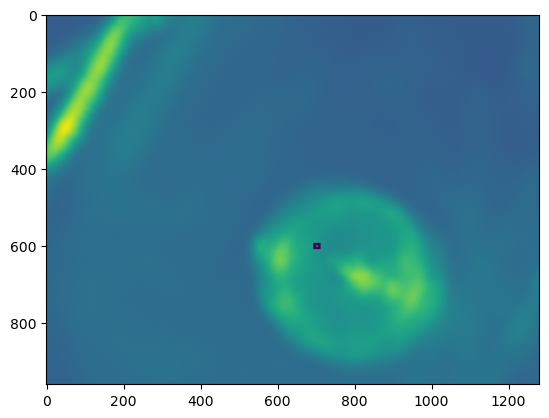

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(arr.sum(0))

## Tip #8: Download Just Part of a Dataset

Load specific columns / fields.

In [27]:
 r['primary']

<BlueskyEventStream {'piezo_x', 'prs', 'piezo_ch_user_setpoint', 'OAV_writing_stats4_total', 'piezo_ch', 'time', 'piezo_z', 'piezo_th', 'OAV_writing_stats1_total', 'piezo_z_user_setpoint', 'piezo_th_user_setpoint', 'OAV2_stats1_total', 'OAV2_stats4_total', 'OAV_writing_stats3_total', 'piezo_x_user_setpoint', 'piezo_y', 'OAV2_stats3_total', 'OAV2_image', 'OAV_writing_image', 'piezo_y_user_setpoint', 'OAV2_stats2_total', 'OAV2_stats5_total', 'OAV_writing_stats5_total', 'OAV_writing_stats2_total', 'prs_user_setpoint'} stream_name='primary'>

In [28]:
r['primary'].read(['piezo_x', 'piezo_y', 'OAV_writing_stats5_total'])  # fast!

<xarray.Dataset> Size: 1kB
Dimensions:                   (dim0: 45)
Dimensions without coordinates: dim0
Data variables:
    piezo_x                   (dim0) float64 360B -3.9e+03 -4e+03 ... -4.1e+03
    OAV_writing_stats5_total  (dim0) float64 360B 1.732e+09 ... 1.608e+09
    piezo_y                   (dim0) float64 360B -8e+03 -8e+03 ... -8e+03

Slice into an image.

```python
r['primary/OAV2_image'].read()
```

is equivalent to

```python
r['primary/OAV2_image'][:]  # standard numpy notation for "slice the entire thing"
```

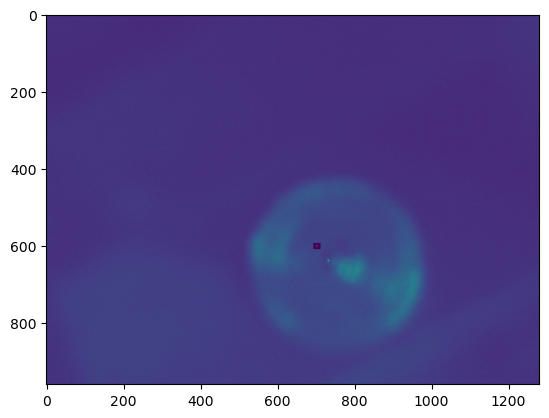

In [29]:
img = r['primary/OAV2_image'][0]  # fast!
plt.imshow(img)

## Tip #9: Stream data live

Just a very basic example here using metadata, but data is available too...

This feature is used at ESM today to enable live visualiztion of their data.

In [30]:
sub = c['tst/sandbox/demo'].subscribe()

def on_update(update):
    print(f"New scan started! It will try to take {update.metadata['start']['num_points']} points.")
    
sub.child_created.add_callback(on_update)
sub.start()

New scan started! It will try to take 3 points.
New scan started! It will try to take 7 points.
New scan started! It will try to take 11 points.


KeyboardInterrupt: 

(Press Stop button in notebook to interrupt this and continue below.)

## Tip 10: Download the Raw Files _Through_ Tiled

In [ ]:
from tiled.client import from_uri

c['smi/migration'][1060180]['primary/OAV2_image'].raw_export("exported")

Failed to run 'pixi install --environment default': Error:   × failed to solve the pypi requirements of environment 'default' for
  │ platform 'linux-64'
  ├─▶ failed to resolve pypi dependencies
  ╰─▶ Because only tiled[client]==0.0.1.dev3102+g7d91f484b is available
      and you require tiled[client], we can conclude that you require
      tiled==0.0.1.dev3102+g7d91f484b.
      And because you require tiled==0.2.3, we can conclude that your
      requirements are unsatisfiable.
  help: The following PyPI packages have been pinned by the conda solve, and
        this version may be causing a conflict:
        tiled==0.2.3


